<h1>Emotion Classification</h1>

<h5>Classifiying emotions and the sentiment behind any given text using Naive bayes and Logistic Regression. 
Also, while doing this task, the data will be cleaned, preprocessed (stemmed and lemmitaized, lemmatization is better) and tokenized. 

The process/ approach taken in this notebook will be first reading the dataset in a dataframe form then I will be exploring the data with basic EDA.

Then I will attempt to do some text statistics but since the data is very small, it won't be as efficient. Also the dataset is fairly clean so not a lot of cleaning will be done

After cleaning, I will tokenize the data and then lemmatize and stem the tokens.

After Tokenization there will be Feature extraction where I will use Count Vectorization and TF-IDF to transform text into numerical feature matrix

Then Building the models will be done in two approahces, one without a pipeline and the other using a pipeline

Then I will train the models and use them to predict the emotion on three sentences but first i will test them on the test set

<h4>Important Libraries imports</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import nltk
from nltk.tokenize import word_tokenize

<h3>Preparing the dataset and some EDA</h3>

<h4>Exploring the dataset</h4>

Displaying the first 10 rows

In [3]:
data=pd.read_csv('C:/Users/PC/Desktop/Datasets/Emotion_classify_Data.csv')
data.head(10)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


As we can see above, the text looks like it is already all in small letters (lower cased letters) so no need to convert it into lower case. Also there are only 2 columns so this is a very simple dataset with a "comment" as the input text and it's label the "emotion". Also no need to drop any columns. 

I also have to see how many datapoints there are which as shown below are 5937, also I explored the data more using data.describe.


In [4]:
data.shape

(5937, 2)

In [5]:
data.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


The above statistics show that there are only three emotions described in the dataset with 5937 data points.

I have to see what are the different emotions are described though. 

In [6]:
data.Emotion.unique() 

array(['fear', 'anger', 'joy'], dtype=object)

Printing the first 10 comments to see how the text looks like for exploring and finding our what to clean and preprocess.

In [7]:
for i in range(10):
    print(data.at[i,'Comment'])

i seriously hate one subject to death but now i feel reluctant to drop it
im so full of life i feel appalled
i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it
ive been really angry with r and i feel like an idiot for trusting him in the first place
i feel suspicious if there is no one outside like the rapture has happened or something
i feel jealous becasue i wanted that kind of love the true connection between two souls and i wanted that
when a friend of mine keeps telling me morbid things that happened to his dog
i finally fell asleep feeling angry useless and still full of anxiety
i feel a bit annoyed and antsy in a good way
i feel like i ve regained another vital part of my life which is living


Lucky as we can see above, the text is short and there are no useless white spaces, no weird unwanted characters, no non-word, no non-whitespace and no urls characters to remove. 

<h5>Some text statistics</h5>

the number of characters present in each comment which gives us an idea of how long each comment is. 

<AxesSubplot: >

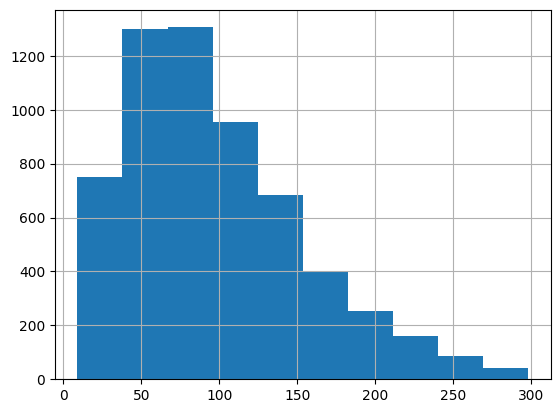

In [8]:
data['Comment'].str.len().hist()

<h4>The number of datapoints in each class

In [9]:
data['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

Checking if there are any Null values in the dataset

In [10]:
print("Total Null values count: ",
      data.isnull().sum().sum())

Total Null values count:  0


In [11]:
print("Count of comments labeled as anger is->",
      data[data['Emotion'] == 'anger']['Comment'].count())
 
# resultant of above dataframe
data[data['Emotion']=='anger']

Count of comments labeled as anger is-> 2000


,Comment,Emotion
1,im so full of life i feel appalled,anger
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
...,...,...
5925,i am feeling bitchy cross whatever,anger
5928,i feel angry because i have led myself to lead...,anger
5929,i mean weve been friends for a long time and t...,anger
5933,i left feeling annoyed and angry thinking that...,anger


In [12]:
print("Count of comments labeled as anger is->",
      data[data['Emotion'] == 'joy']['Comment'].count())
 
# resultant of above dataframe
data[data['Emotion']=='joy']

Count of comments labeled as anger is-> 2000


,Comment,Emotion
3,ive been really angry with r and i feel like a...,joy
9,i feel like i ve regained another vital part o...,joy
10,i feel a bit like franz liebkind in the produc...,joy
11,i was feeling at the start didnt want to move ...,joy
13,i do not always find myself feeling thankful b...,joy
...,...,...
5917,i feel re invigorated and full of ambition,joy
5921,i feel instantly glamorous just pulling it out...,joy
5922,i feel wonderful and i m very very grateful fo...,joy
5931,i have lost touch with the things that i feel ...,joy


In [13]:
print("Count of comments labeled as anger is->",
      data[data['Emotion'] == 'fear']['Comment'].count())
 
# resultant of above dataframe
data[data['Emotion']=='fear']

Count of comments labeled as anger is-> 1937


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
2,i sit here to write i start to dig out my feel...,fear
4,i feel suspicious if there is no one outside l...,fear
12,i was bitten by a dog,fear
19,i feel like i have to redeem myself even thoug...,fear
...,...,...
5926,i must say that there were all familiar faces ...,fear
5927,i have never done anything to make her cry or ...,fear
5930,i think we often feel this way about planting ...,fear
5932,i begun to feel distressed for you,fear


The above code shows that the data is almost balance as all labels have almost 2000 data points. 

<h2>Tokenization</h2> 

As we can see above, the data is clean and ready to be used. 

In [14]:
data['Comment'] = data['Comment'].apply(word_tokenize)

In [15]:
data.head(5)

,Comment,Emotion
0,"[i, seriously, hate, one, subject, to, death, ...",fear
1,"[im, so, full, of, life, i, feel, appalled]",anger
2,"[i, sit, here, to, write, i, start, to, dig, o...",fear
3,"[ive, been, really, angry, with, r, and, i, fe...",joy
4,"[i, feel, suspicious, if, there, is, no, one, ...",fear


<h5>Cleaning the data by removing stop words

In [16]:
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stop_words = set(stopwords.words('english'))
data['Comment'] = data['Comment'].apply(lambda x: [word for word in x if word not in stop_words])

<h2>Tokenized, preprocessed data <h2>

displaying the first 10 comments as they are cleaned, tokenized.

In [19]:
for i in range(10):
    print(data.at[i,'Comment'])

['seriously', 'hate', 'one', 'subject', 'death', 'feel', 'reluctant', 'drop']
['im', 'full', 'life', 'feel', 'appalled']
['sit', 'write', 'start', 'dig', 'feelings', 'think', 'afraid', 'accept', 'possibility', 'might', 'make']
['ive', 'really', 'angry', 'r', 'feel', 'like', 'idiot', 'trusting', 'first', 'place']
['feel', 'suspicious', 'one', 'outside', 'like', 'rapture', 'happened', 'something']
['feel', 'jealous', 'becasue', 'wanted', 'kind', 'love', 'true', 'connection', 'two', 'souls', 'wanted']
['friend', 'mine', 'keeps', 'telling', 'morbid', 'things', 'happened', 'dog']
['finally', 'fell', 'asleep', 'feeling', 'angry', 'useless', 'still', 'full', 'anxiety']
['feel', 'bit', 'annoyed', 'antsy', 'good', 'way']
['feel', 'like', 'regained', 'another', 'vital', 'part', 'life', 'living']


<h3>Stemming 

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [21]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

In [22]:
# Apply the function to the 'text' column and create a new column 'stemmed_text'
data['stemmed_comment'] = data['Comment'].apply(stem_words)

In [23]:
for i in range(10):
    print(data.at[i,'stemmed_comment'])

['serious', 'hate', 'one', 'subject', 'death', 'feel', 'reluct', 'drop']
['im', 'full', 'life', 'feel', 'appal']
['sit', 'write', 'start', 'dig', 'feel', 'think', 'afraid', 'accept', 'possibl', 'might', 'make']
['ive', 'realli', 'angri', 'r', 'feel', 'like', 'idiot', 'trust', 'first', 'place']
['feel', 'suspici', 'one', 'outsid', 'like', 'raptur', 'happen', 'someth']
['feel', 'jealou', 'becasu', 'want', 'kind', 'love', 'true', 'connect', 'two', 'soul', 'want']
['friend', 'mine', 'keep', 'tell', 'morbid', 'thing', 'happen', 'dog']
['final', 'fell', 'asleep', 'feel', 'angri', 'useless', 'still', 'full', 'anxieti']
['feel', 'bit', 'annoy', 'antsi', 'good', 'way']
['feel', 'like', 'regain', 'anoth', 'vital', 'part', 'life', 'live']


<h4>Lemmetization

In [24]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()


In [26]:
# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # return lemmatized tokens as a list
    return lemmas

In [27]:
# apply lemmatization function to column of dataframe
data['preprocessed_comment'] = data['stemmed_comment'].apply(lemmatize_tokens)

In [28]:
for i in range(10):
    print(data.at[i,'preprocessed_comment'])

['serious', 'hate', 'one', 'subject', 'death', 'feel', 'reluct', 'drop']
['im', 'full', 'life', 'feel', 'appal']
['sit', 'write', 'start', 'dig', 'feel', 'think', 'afraid', 'accept', 'possibl', 'might', 'make']
['ive', 'realli', 'angri', 'r', 'feel', 'like', 'idiot', 'trust', 'first', 'place']
['feel', 'suspici', 'one', 'outsid', 'like', 'raptur', 'happen', 'someth']
['feel', 'jealou', 'becasu', 'want', 'kind', 'love', 'true', 'connect', 'two', 'soul', 'want']
['friend', 'mine', 'keep', 'tell', 'morbid', 'thing', 'happen', 'dog']
['final', 'fell', 'asleep', 'feel', 'angri', 'useless', 'still', 'full', 'anxieti']
['feel', 'bit', 'annoy', 'antsi', 'good', 'way']
['feel', 'like', 'regain', 'anoth', 'vital', 'part', 'life', 'live']


In [29]:
data.head(4)

,Comment,Emotion,stemmed_comment,preprocessed_comment
0,"[seriously, hate, one, subject, death, feel, r...",fear,"[serious, hate, one, subject, death, feel, rel...","[serious, hate, one, subject, death, feel, rel..."
1,"[im, full, life, feel, appalled]",anger,"[im, full, life, feel, appal]","[im, full, life, feel, appal]"
2,"[sit, write, start, dig, feelings, think, afra...",fear,"[sit, write, start, dig, feel, think, afraid, ...","[sit, write, start, dig, feel, think, afraid, ..."
3,"[ive, really, angry, r, feel, like, idiot, tru...",joy,"[ive, realli, angri, r, feel, like, idiot, tru...","[ive, realli, angri, r, feel, like, idiot, tru..."


<h2>Preparing the dataset for training and testing 

I splitted the dataset into X (data/input) and y (label/output)

In [30]:
x = data["preprocessed_comment"]
y = data["Emotion"]

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_test

1867    [give, time, feel, point, friendship, one, can...
3988    [im, firm, believ, noth, make, woman, feel, mu...
4516    [feel, vulner, one, realli, close, ever, die, ...
1397            [close, eye, anger, feel, disgust, touch]
1669                               [feel, like, distract]
                              ...                        
642     [feel, even, less, splendid, noth, need, do, d...
1253                                       [feel, confus]
3094    [may, pour, half, empti, cup, still, make, sig...
3733    [realli, want, challeng, fun, way, everyon, kn...
3523    [buy, synthet, pearl, feel, need, use, eleg, j...
Name: preprocessed_comment, Length: 1188, dtype: object

In [34]:
x_train

4945    [rememb, day, phone, fri, shannon, tell, cri, ...
5428    [go, gym, mani, time, last, spring, kind, get,...
1344    [feel, irrit, either, interrupt, quiet, time, ...
1888    [realli, hate, feel, realli, give, much, damn,...
2480                          [left, feel, littl, shaken]
                              ...                        
3772    [im, feel, stress, upcom, event, drown, feel, ...
5191    [adress, issu, attempt, reason, may, feel, les...
5226    [rememb, cammi, coupl, month, old, look, sweet...
5390    [know, feel, feel, absolut, terrifi, overwhelm...
860                       [answer, feel, rather, skeptic]
Name: preprocessed_comment, Length: 4749, dtype: object

<h3>Further Preparation 

The x_train and x_test are a series of lists which the .fit functions will not accept, the .fit function later in training will want the input to be a sequence of strings, not lists. So I had to convert the series of lists into a series of strings as shown below. 

In [35]:
x_train_string = x_train.apply(lambda x: ' '.join(x))
x_test_string = x_test.apply(lambda x: ' '.join(x))

<h3>Feature Extraction

For feature extraction, I will use Count Vectorizer to transform each text into numerical representation in the form of a vector. then use TF-IDF to make a matrix of features. 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), strip_accents='unicode', min_df=3, max_df=0.5)


In [38]:
X_train = vectorizer.fit_transform(x_train_string)
X_test = vectorizer.transform(x_test_string)


Making sure that, after the vectorization is applied, the number of features 
of training set and the number of features of test set are equal

In [39]:
X_train.shape

(4749, 3062)

In [40]:
X_test.shape

(1188, 3062)

as we can see they are equal so it's good to go

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(use_idf=True, smooth_idf = True)


In [42]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [43]:
X_train.shape

(4749, 3062)

In [44]:
X_test.shape

(1188, 3062)

<h2>The models

<h4>Logistic regression Classifier 


There are to approaches to building the classifier, first is to make an object from the LogisticRegression class and fit the model directly on the data. the second approach is to make a pipeline that will do the feature engineering and the apply the model. Both approaches are implemented as I wanted to use both for two different reasons, apply the feature engineering alone and see the results and also I needed to build a pipeline so that I can make the final function prediction as shown below.  

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
classifier1 = LogisticRegression()

In [47]:
classifier1.fit(X_train, y_train)

LogisticRegression()

<h5>Predictions

In [48]:
predictions = classifier1.predict(X_test)


In [49]:
predictions.shape

(1188,)

In [50]:
predictions

array(['anger', 'joy', 'fear', ..., 'joy', 'fear', 'joy'], dtype=object)

<h5>Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
conf_matrix = confusion_matrix(y_test, predictions)

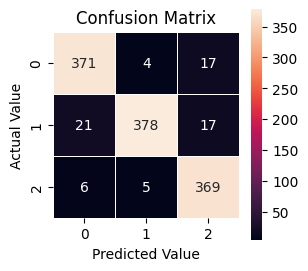

In [53]:
n = len(conf_matrix)
plt.figure(figsize = (n, n))
sns.heatmap(conf_matrix, annot=True,fmt='d', linewidths=0.4, square=True, cbar=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()


It looks like the model is performing well as it has predicted the majority of the test data right

<h3>Report on the predictions

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       anger       0.93      0.95      0.94       392
        fear       0.98      0.91      0.94       416
         joy       0.92      0.97      0.94       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



<h3>The score of the classifier

In [55]:
classifier1.score(X_test, y_test) #returns the mean accuracy of the given test set

0.9410774410774411

<h2>Making the models Using Pipelines

<h5> (from sklearn.pipeline import make_pipeline)

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 

In [57]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

I also made a function to do all the above preprocessing just for the input given sentence by any user. The text would need to be preprocessed differently than the dataset and the function is needed to be applied inside the final function. 

In [1]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Remove special characters and numbers

    text = text.lower() #Convert to lowercase
    
    tokens = word_tokenize(text) #Tokenization

    stop_words = set(stopwords.words('english')) #Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer() #Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    lemmatizer = WordNetLemmatizer() #Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    cleaned_text = ' '.join(tokens) 
    return cleaned_text


<h2>Training the Logistic Regression Pipeline

In [59]:
model1 = make_pipeline(CountVectorizer(),
                        TfidfTransformer(),
                          MultinomialNB())

In [60]:
model1.fit(x_train_string, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

<h4>Testing logistic regression on the test set

In [61]:
y_pred = model1.predict(x_test_string)

In [62]:
y_pred.shape

(1188,)

<h2>Report On model performance 

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.92      0.88      0.90       416
         joy       0.91      0.90      0.90       380

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



In [98]:
model1.score(x_test_string, y_test) #returns the mean accuracy of the given test set

0.9015151515151515

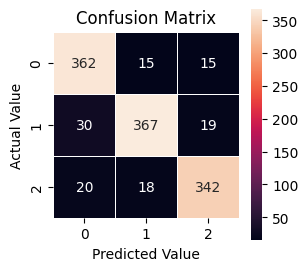

In [63]:
conf_matrix3 = confusion_matrix(y_test, y_pred)
n3 = len(conf_matrix3)
plt.figure(figsize = (n3, n3))
sns.heatmap(conf_matrix3, annot=True,fmt='d', linewidths=0.4, square=True, cbar=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

<h4>Logistic Regression Accuracy 

In [64]:
accuracy_score = accuracy_score(y_pred,y_test) 
print('accuracy score : ',accuracy_score)

accuracy score :  0.9015151515151515


<h4>A Final function to automate the predictions

In [65]:
def emotionPredModel1(text, model):
    preprocessedtext = preprocess_text(text)
    pred = model.predict([preprocessedtext])
    return pred[0]

<h2>Testing Logistic Regression with function 

In [104]:
sent1 = "i was so thrilled by the wedding"
result = emotionPredModel1(sent1, model1)
print(f"Input: {sent1}")
print(f"Logistic regression classifier prediction: {result}")

Input: i was so thrilled by the wedding
Logistic regression classifier prediction: joy


In [67]:
sent2 = "Repeated mistakes from my colleague infuriate me beyond words."
result2 = emotionPredModel1(sent2,model1)
print(f"Input: {sent2}")
print(f"Logistic regression classifier prediction: {result2}")

Input: Repeated mistakes from my colleague infuriate me beyond words.
Logistic regression classifier prediction: fear


In [68]:
sent3 = "Staring into the abyss made me feel a deep sense of dread."
result3 = emotionPredModel1(sent3,model1)
print(f"Input: {sent3}")
print(f"Logistic regression classifier prediction: {result3}")

Input: Staring into the abyss made me feel a deep sense of dread.
Logistic regression classifier prediction: fear


In [69]:
print(emotionPredModel1("The sudden crash made my heart race.",model1))

fear


<h4> Naive Bayes Classifier 2 

In [70]:
model2 = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

In [77]:
model2.fit(x_train_string, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

In [78]:
y_pred_2 = model2.predict(x_test_string)

In [90]:
y_pred_2.shape

(1188,)

<h2>Report on performance

In [95]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.92      0.88      0.90       416
         joy       0.91      0.90      0.90       380

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



In [96]:
model2.score(x_test_string, y_test) #returns the mean accuracy of the given test set

0.9015151515151515

In [80]:
conf_matrix2 = confusion_matrix(y_test, y_pred_2)

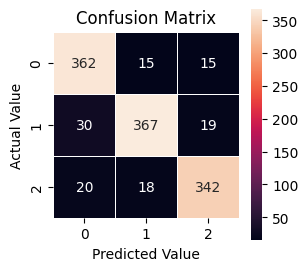

In [81]:
n2 = len(conf_matrix2)
plt.figure(figsize = (n2, n2))
sns.heatmap(conf_matrix2, annot=True,fmt='d', linewidths=0.4, square=True, cbar=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

<h3>Final Function to Automate the predictions

In [83]:
def emotionPredModel2(text):
    preprocessedtext2 = preprocess_text(text)
    pred2 = model2.predict([preprocessedtext2])
    return pred2[0]

<h2>Testing Naive Bayes

In [99]:
sent4 = "The ominous shadows in the abandoned building gave me a sense of dread"
result4 = emotionPredModel1(sent4, model2)
print(f"Input: {sent4}")
print(f"Logistic regression classifier prediction: {result4}")

Input: The ominous shadows in the abandoned building gave me a sense of dread
Logistic regression classifier prediction: fear


In [100]:
sent5 = "I am very satisfied with my exam grade"
result5 = emotionPredModel1(sent5, model2)
print(f"Input: {sent5}")
print(f"Logistic regression classifier prediction: {result5}")

Input: I am very satisfied with my exam grade
Logistic regression classifier prediction: joy


In [103]:
sent6 = "Being ignored and dismissed during the meeting infuriated me."
result6 = emotionPredModel1(sent6, model2)
print(f"Input: {sent6}")
print(f"Logistic regression classifier prediction: {result6}")

Input: Being ignored and dismissed during the meeting infuriated me.
Logistic regression classifier prediction: anger
